In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from pandas.plotting import bootstrap_plot
import seaborn as sns

In [72]:
df = pd.read_csv("All_Data.csv")

In [73]:
df.drop(columns = ["Low latitude (deg)", "Low longitude (deg)", "High latitude (deg)", "High longitude (deg)", 
                   "Average speed (m/s)","Max speed (m/s)","Min speed (m/s)","Average weight (kg)", "Max weight (kg)", 
                   "Min weight (kg)", "Guided breathing duration (ms)", "Strength training duration (ms)", 
                   "Rowing machine duration (ms)", "Biking duration (ms)", "CrossFit duration (ms)" ], inplace= True)

In [74]:
df['DateTime'] = df['Date'] + ' ' + df['Start time']
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.index = df['DateTime']
df.drop(columns = 'DateTime', inplace = True)
df = df.tshift(9, 'H')
df.index = df.index.tz_localize(None)

In [75]:
df['Day'] = df.index.day_name()
df['Hour'] = df.index.hour
df = df['2019']
df

,Start time,End time,Calories (kcal),Distance (m),Step count,Move Minutes count,Inactive duration (ms),Walking duration (ms),Date,Running duration (ms),Day,Hour
DateTime,,,,,,,,,,,,
2019-01-01 00:00:00,15:00:00.000Z,15:15:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 00:15:00,15:15:00.000Z,15:30:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 00:30:00,15:30:00.000Z,15:45:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 00:45:00,15:45:00.000Z,16:00:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 01:00:00,16:00:00.000Z,16:15:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,13:45:00.000Z,14:00:00.000Z,49.646296,565.945238,796.0,9.0,252038.0,523961.0,2019-12-31,NaN,Tuesday,22
2019-12-31 23:00:00,14:00:00.000Z,14:15:00.000Z,72.824196,929.576180,1328.0,15.0,NaN,900000.0,2019-12-31,NaN,Tuesday,23
2019-12-31 23:15:00,14:15:00.000Z,14:30:00.000Z,46.181592,387.798776,562.0,8.0,311029.0,467749.0,2019-12-31,NaN,Tuesday,23


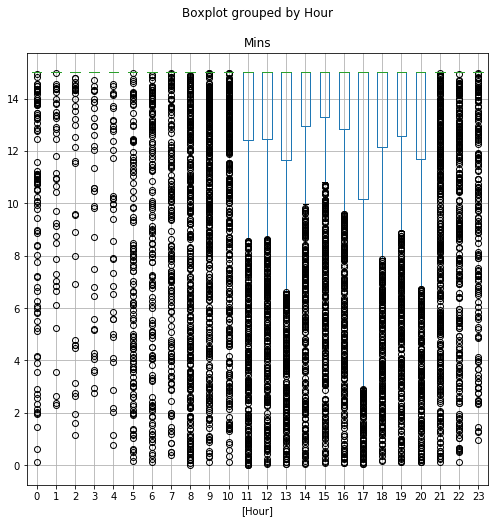

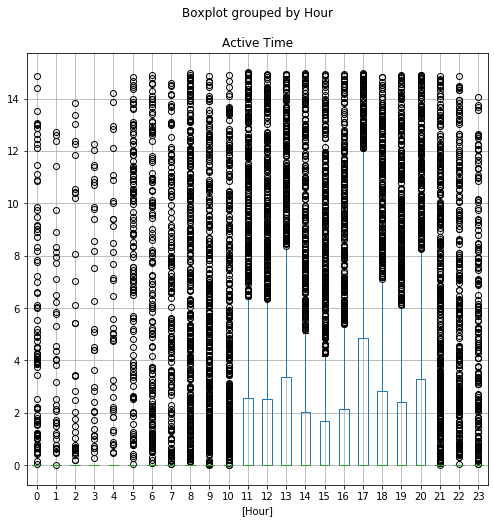

In [76]:
df['Mins'] = df['Inactive duration (ms)'].apply(lambda x: x/(1000*60))
df['Active Time'] = df['Mins'].apply(lambda x: 15-x)
df[['Mins', 'Hour']].boxplot(by='Hour', figsize=(8,8))
df[['Active Time', 'Hour']].boxplot(by='Hour', figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D9D86339C8>]],
      dtype=object)

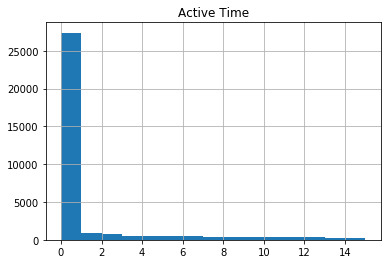

In [77]:
df.hist(column='Active Time', bins=15)

In [78]:
df['Active Time'].describe()

count    33833.000000
mean         1.282241
std          3.161424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.997950
Name: Active Time, dtype: float64

count    8760.000000
mean        4.952290
std         8.226492
min         0.000000
25%         0.000000
50%         0.000000
75%         7.838796
max        48.468250
Name: Active Time, dtype: float64

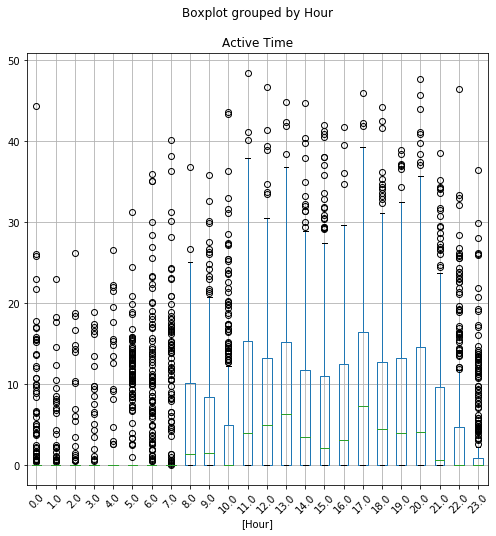

In [79]:
df_hour = df.resample('H').agg({'Active Time': 'sum', 'Hour': 'mean'})
df_hour[['Active Time', 'Hour']].boxplot(by='Hour', rot=45, figsize=(8,8))
df_hour['Active Time'].describe()

Number of 0 values:  4987
Percentage of 0 values:  56.93
Total amount of values between 0-2:  5368


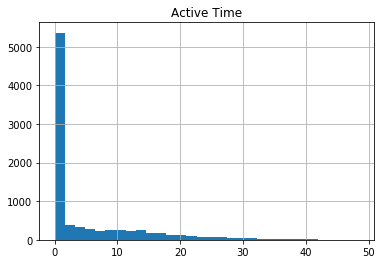

In [80]:
df_hour.hist(column='Active Time', bins=30)
df_hour['Active Time'].describe()
print('Number of 0 values: ',df_hour['Active Time'].value_counts()[0])
print('Percentage of 0 values: ',round(df_hour['Active Time'].value_counts(normalize=True)[0], 4) *100)
print('Total amount of values between 0-2: ',df_hour['Active Time'].value_counts(bins=30)[0])

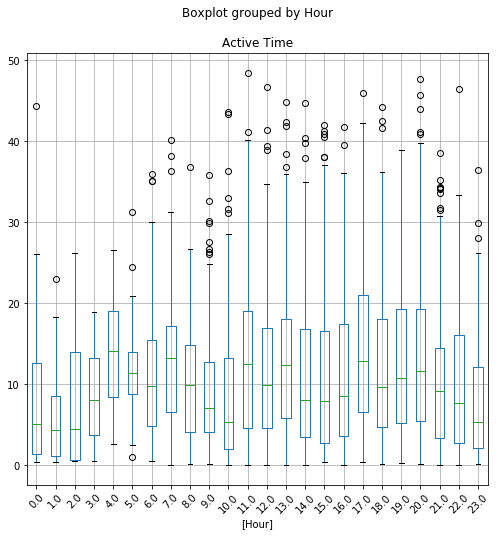

In [81]:
df_hour_trimmed = df_hour[(df_hour['Active Time']>0)]
df_hour_trimmed[['Active Time', 'Hour']].boxplot(by='Hour', rot=45, figsize=(8,8))

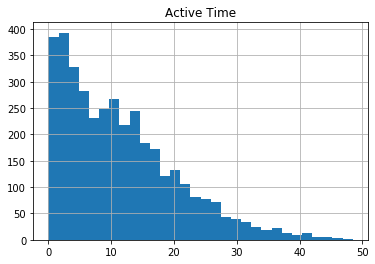

In [82]:
df_hour_trimmed.hist(column='Active Time', bins=30)
plt.show()

In [83]:
df_hour_trimmed['Active Time'].describe()

count    3773.000000
mean       11.498027
std         9.047993
min         0.006050
25%         4.069700
50%         9.798367
75%        16.680283
max        48.468250
Name: Active Time, dtype: float64

In [84]:
df_hour_top = df_hour[(df_hour['Active Time']<=0)]
df_hour_top['Active Time'].describe()

count    4987.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Active Time, dtype: float64

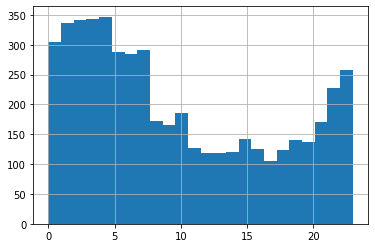

In [85]:
df_hour_top['Hour'].hist(bins=24)
#df_hour_top[df_hour_top['Hour'].isnull()]

In [86]:
#df['2019-04-18 20':'2019-04-18 23'].head(10)

### Dataset Review
#### The amount of active time per hour in 2019.
    1. Ranging from 0-60 active minutes
    2. Spanning all hours of the day
    3. Left-skewed

#### The amount of completely inactive time for each hour in 2019
    1. The importance is the frequency for each hour 

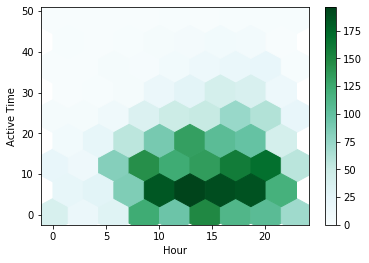

In [102]:
df_hour_trimmed.plot.hexbin(x='Hour', y='Active Time', gridsize=8, sharex=False)
plt.show()

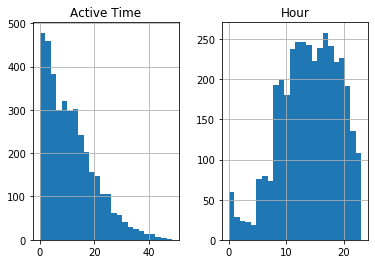

In [268]:
df_heatmap = df_hour_trimmed[['Active Time', 'Hour']]
df_heatmap.hist(bins=24)
plt.show()

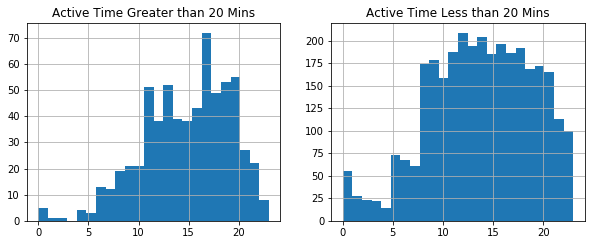

In [89]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(221)
ax = df_hour_trimmed[df_hour_trimmed['Active Time'] > 20]['Hour'].hist(bins=24)
ax.title.set_text('Active Time Greater than 20 Mins')

ax2 = fig.add_subplot(222)
ax2 = df_hour_trimmed[df_hour_trimmed['Active Time'] < 20]['Hour'].hist(bins=24)
ax2.title.set_text('Active Time Less than 20 Mins')

In [90]:
df_heatmap['Active Time'] = round(df_heatmap['Active Time'])
df_heatmap = pd.crosstab(df_heatmap['Active Time'], df_heatmap['Hour'])

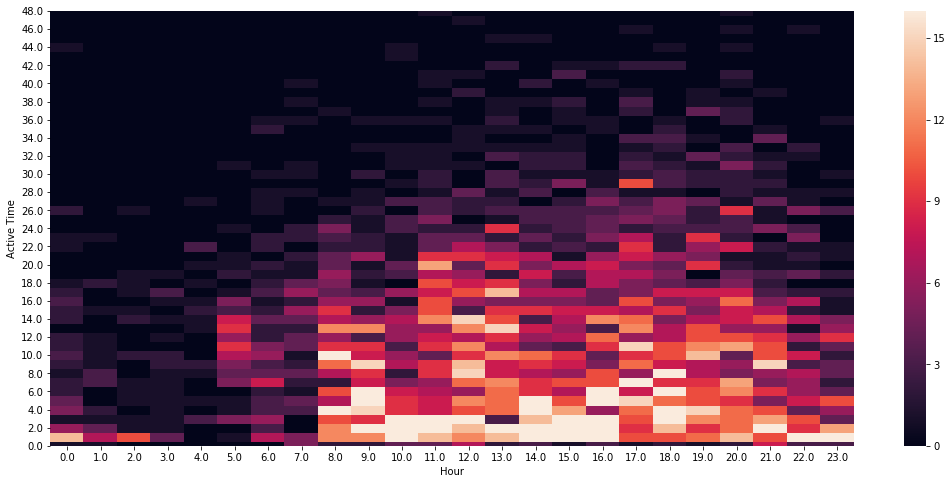

In [91]:
plt.subplots(figsize=(18,8)) 
ax = sns.heatmap(df_heatmap, robust=True)
#ax = sns.heatmap(df_heatmap, robust=True, mask = (df_heatmap == 0))
ax.invert_yaxis()

In [161]:
df_heatmap = df_hour_top[['Active Time', 'Hour']]
#df_heatmap['Active Time'] = round(df_heatmap['Active Time'])
df_heatmap = pd.crosstab(df_heatmap['Active Time'], df_heatmap['Hour'])
df_heatmap

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Active Time,,,,,,,,,,,,,,,,,,,,,
0.0,305,336,341,343,347,288,285,292,172,166,...,121,142,126,106,123,141,137,171,228,257


In [93]:
df_hour_trimmed.groupby('Hour').count().T

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Active Time,60,29,24,22,18,76,80,73,193,199,...,243,223,239,258,241,222,227,192,135,108


In [94]:
df_heatmap_totals = [365] * 24
df_dic = dict(enumerate(df_heatmap_totals))
df_heatmap_labels = df_heatmap.append(df_dic, ignore_index=True)
df_hmap_percent = dict((df_heatmap_labels.T[0] / df_heatmap_labels.T[1]))
df_hmap_percent = pd.DataFrame(df_hmap_percent, index=[0])
df_hmap_percent

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
0,0.835616,0.920548,0.934247,0.939726,0.950685,0.789041,0.780822,0.8,0.471233,0.454795,...,0.331507,0.389041,0.345205,0.290411,0.336986,0.386301,0.375342,0.468493,0.624658,0.70411


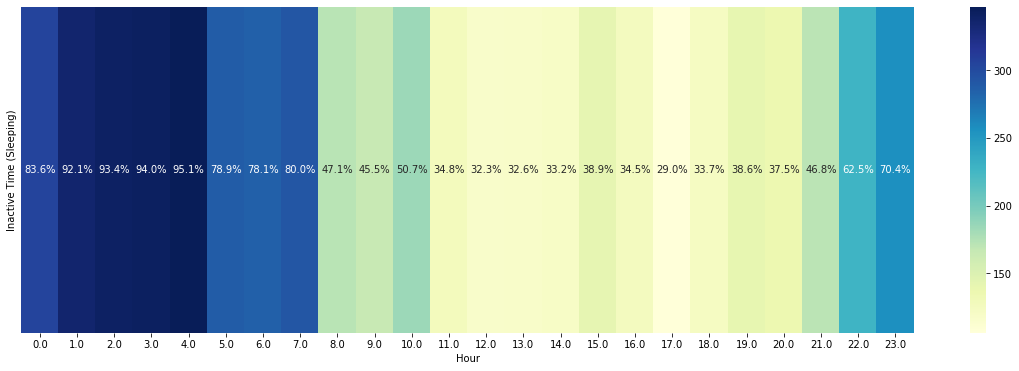

In [95]:
plt.subplots(figsize=(20,6)) 
ax = sns.heatmap(df_heatmap, annot=df_hmap_percent, cmap="YlGnBu", fmt='.01%',yticklabels=False)
ax.set_ylabel('Inactive Time (Sleeping)')
plt.show()

In [228]:
def timeframe(x):
    whattime = ' '
    if x in range(5,11):
        # 5am - 10am
        whattime = 'Morning'
    elif x in range(11,18):
        # 11am - 5pm
        whattime = 'Afternoon'
    elif x in range(18,23):
        # 6pm - 10pm
        whattime = 'Evening'
    else:
        # 11pm - 4am
        whattime = 'Night'
    
    return (whattime)

In [ ]:
#Create a pie chart for how much sleep I get each day

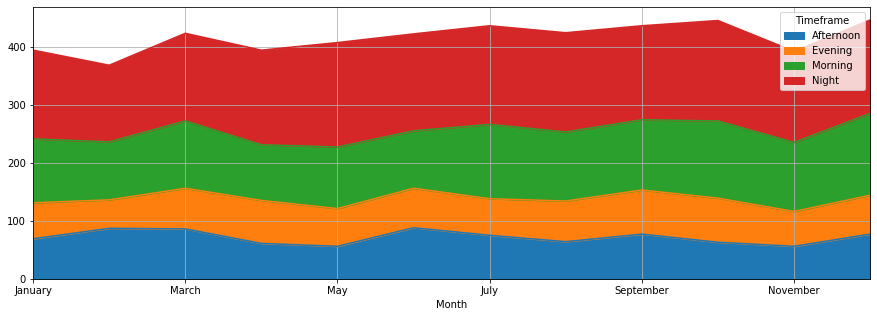

In [237]:
df_heatmap_stack = df_hour_top[['Active Time', 'Hour']]
df_heatmap_stack['Month'] = df_heatmap_stack.index.month_name()
df_heatmap_stack['Timeframe'] = df_heatmap_stack['Hour'].apply(lambda x: timeframe(x))
df_heatmap_stack_ct = pd.crosstab(df_heatmap_stack['Month'],df_heatmap_stack['Timeframe'])
df_heatmap_stack_ct = df_heatmap_stack_ct.reindex(['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December'])
df_heatmap_stack_ct.plot.area(grid=True, figsize=(15,5))
plt.show()

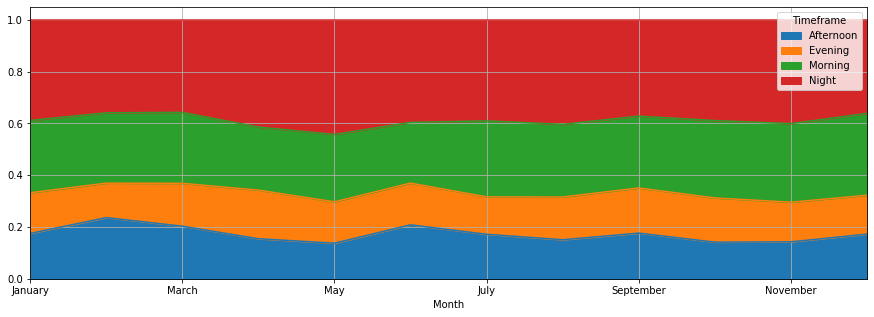

In [238]:
df_heatmap_stack_ct = df_heatmap_stack_ct.div(df_heatmap_stack_ct.sum(axis=1), axis=0)
df_heatmap_stack_ct.apply(lambda x: round((x*100),2))
df_heatmap_stack_ct.plot.area(grid=True, figsize=(15,5))
plt.show()

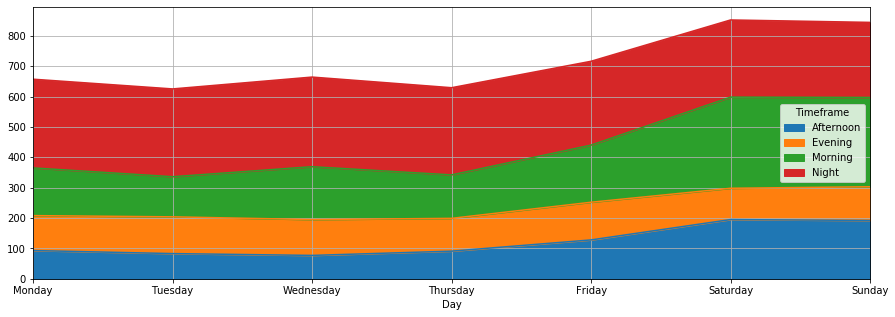

In [239]:
df_heatmap_stack = df_hour_top[['Active Time', 'Hour']]
df_heatmap_stack['Day'] = df_heatmap_stack.index.day_name()
df_heatmap_stack['Timeframe'] = df_heatmap_stack['Hour'].apply(lambda x: timeframe(x))
df_heatmap_stack_ct = pd.crosstab(df_heatmap_stack['Day'],df_heatmap_stack['Timeframe'])
df_heatmap_stack_ct = df_heatmap_stack_ct.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_heatmap_stack_ct.plot.area(grid=True, figsize=(15,5))
plt.show()

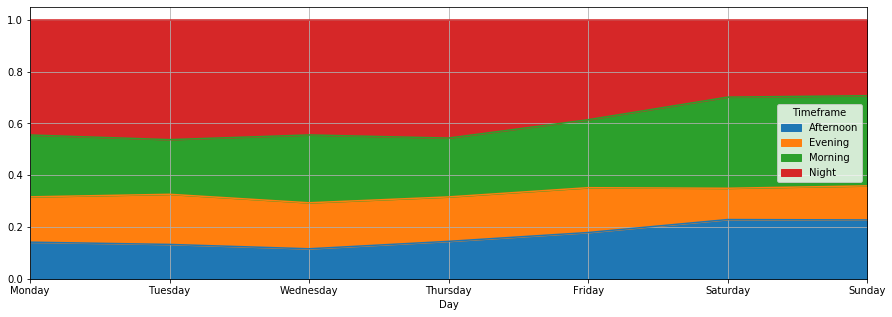

In [246]:
df_heatmap_stack_ct = df_heatmap_stack_ct.div(df_heatmap_stack_ct.sum(axis=1), axis=0)
df_heatmap_stack_ct.apply(lambda x: round((x*100),2))
df_heatmap_stack_ct.plot.area( grid=True, figsize=(15,5))
plt.show()

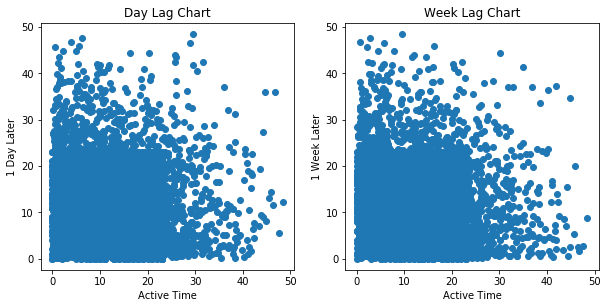

In [241]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
ax = lag_plot(df_hour_trimmed[['Active Time', 'Hour']], lag=24)
ax.title.set_text('Day Lag Chart')
ax.set_xlabel('Active Time')
ax.set_ylabel('1 Day Later')

ax1 = fig.add_subplot(222)
ax1 = lag_plot(df_hour_trimmed[['Active Time', 'Hour']], lag=24*7)
ax1.title.set_text('Week Lag Chart')
ax1.set_xlabel('Active Time')
ax1.set_ylabel('1 Week Later')

plt.show()

## Original data visualization without data cleaning

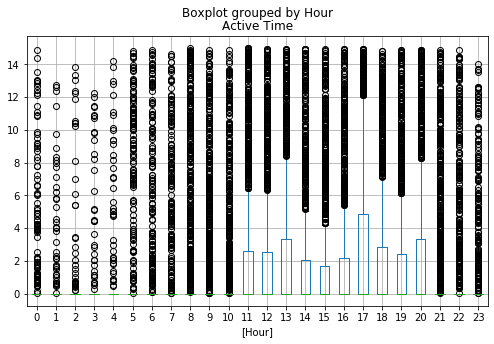

In [27]:
df[['Active Time', 'Hour']].boxplot(by='Hour', figsize=(8,5))
plt.show()

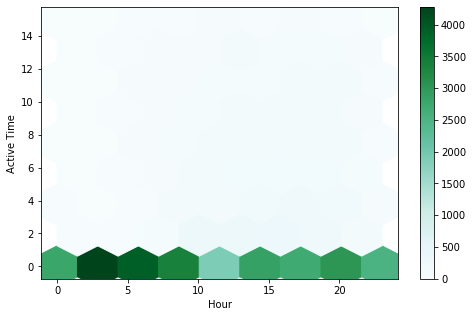

In [28]:
df.plot.hexbin(x='Hour', y='Active Time', gridsize=8, sharex=False, figsize=(8,5))
plt.show()

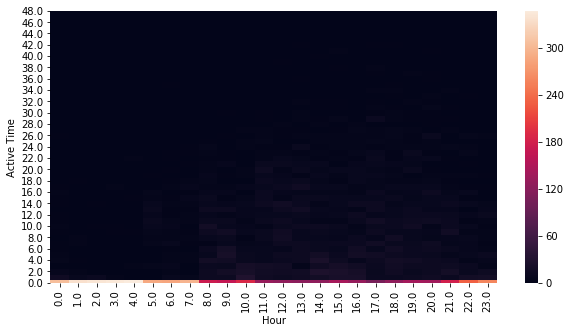

In [29]:
df_heatmap = df_hour[['Active Time', 'Hour']]
df_heatmap['Active Time'] = round(df_heatmap['Active Time'])
df_heatmap = pd.crosstab(df_heatmap['Active Time'], df_heatmap['Hour'])
plt.subplots(figsize=(10,5)) 
ax = sns.heatmap(df_heatmap)
ax.invert_yaxis()

# Break Time -- Below we will look into misleading data and incorrect models

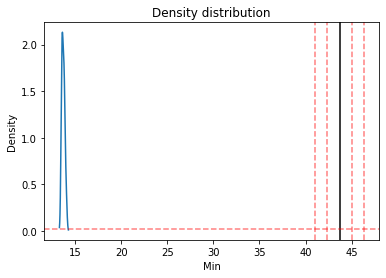

In [267]:
ax = df_test['Mins'].resample('M').mean().plot.kde()
ax.set_xlabel('Min')
ax.title.set_text('Density distribution')
ax.axvline(43.687685, color ='black')
ax.axvline(43.687685 + 1.316153, color ='r' , linestyle = '--', alpha =.5)
ax.axvline(43.687685 - 1.316153, color ='r' , linestyle = '--', alpha =.5)
ax.axvline(43.687685 + (1.316153 * 2), color ='r' , linestyle = '--', alpha =.5)
ax.axvline(43.687685 - (1.316153 * 2), color ='r' , linestyle = '--', alpha =.5)
ax.axhline(.025, color ='r', linestyle ='--', alpha =.5)

### ~95% data falls within 2 stds

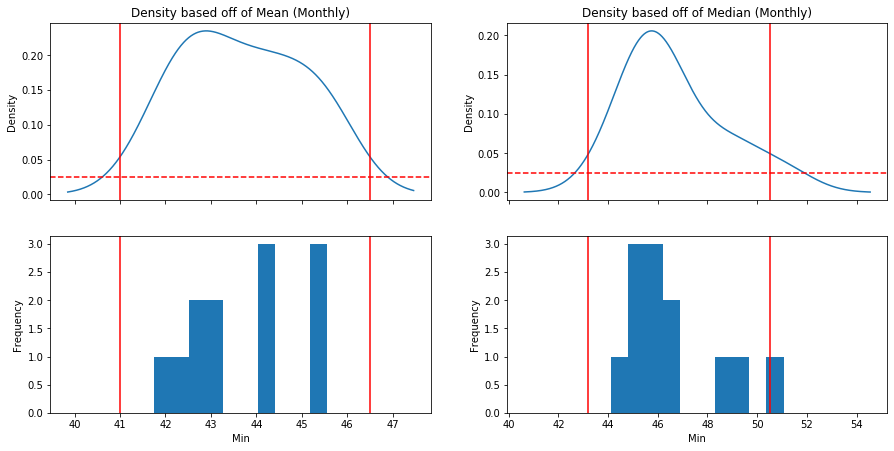

In [213]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(421)
ax = df_test['Mins'].resample('M').mean().plot.kde()
ax.axvline(41, color ='r')
ax.axvline(46.5, color ='r')
ax.axhline(.025, color ='r', linestyle ='--')
ax.title.set_text('Density based off of Mean (Monthly)')
#ax.set_xlabel('Min')

ax2 = fig.add_subplot(422)
ax2 = df_test['Mins'].resample('M').median().plot.kde()
ax2.axvline(43.2, color ='r')
ax2.axvline(50.5, color ='r')
ax2.axhline(.025, color ='r', linestyle ='--')
ax2.title.set_text('Density based off of Median (Monthly)')
#ax2.set_xlabel('Min')

ax3 = fig.add_subplot(423, sharex=ax)
ax3 = df_test['Mins'].resample('M').mean().plot.hist()
ax3.axvline(41, color ='r')
ax3.axvline(46.5, color ='r')
ax3.set_xlabel('Min')

ax4 = fig.add_subplot(424, sharex=ax2)
ax4 = df_test['Mins'].resample('M').median().plot.hist()
ax4.axvline(43.2, color ='r')
ax4.axvline(50.5, color ='r')
ax4.set_xlabel('Min')

plt.show()


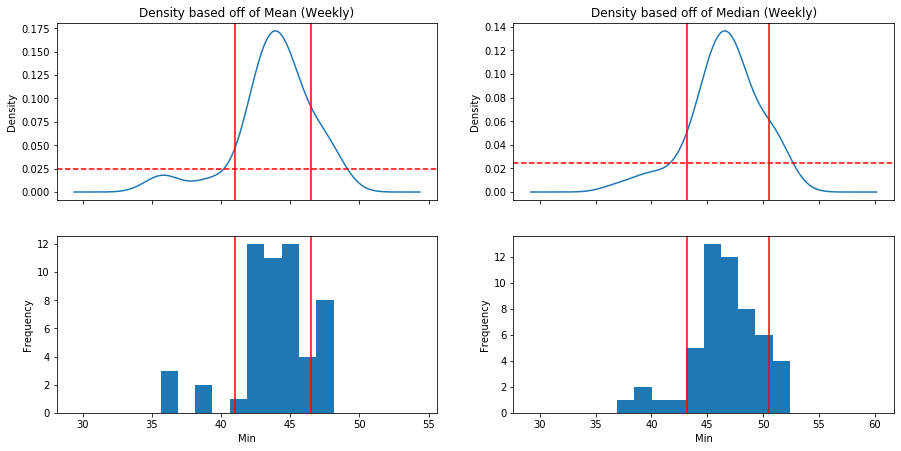

In [214]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(421)
ax = df_test['Mins'].resample('W').mean().plot.kde()
ax.axvline(41, color ='r')
ax.axvline(46.5, color ='r')
ax.axhline(.025, color ='r', linestyle ='--')
ax.title.set_text('Density based off of Mean (Weekly)')
#ax.set_xlabel('Min')

ax2 = fig.add_subplot(422)
ax2 = df_test['Mins'].resample('W').median().plot.kde()
ax2.axvline(43.2, color ='r')
ax2.axvline(50.5, color ='r')
ax2.axhline(.025, color ='r', linestyle ='--')
ax2.title.set_text('Density based off of Median (Weekly)')
#ax2.set_xlabel('Min')

ax3 = fig.add_subplot(423, sharex=ax)
ax3 = df_test['Mins'].resample('W').mean().plot.hist()
ax3.axvline(41, color ='r')
ax3.axvline(46.5, color ='r')
ax3.set_xlabel('Min')

ax4 = fig.add_subplot(424, sharex=ax2)
ax4 = df_test['Mins'].resample('W').median().plot.hist()
ax4.axvline(43.2, color ='r')
ax4.axvline(50.5, color ='r')
ax4.set_xlabel('Min')

plt.show()


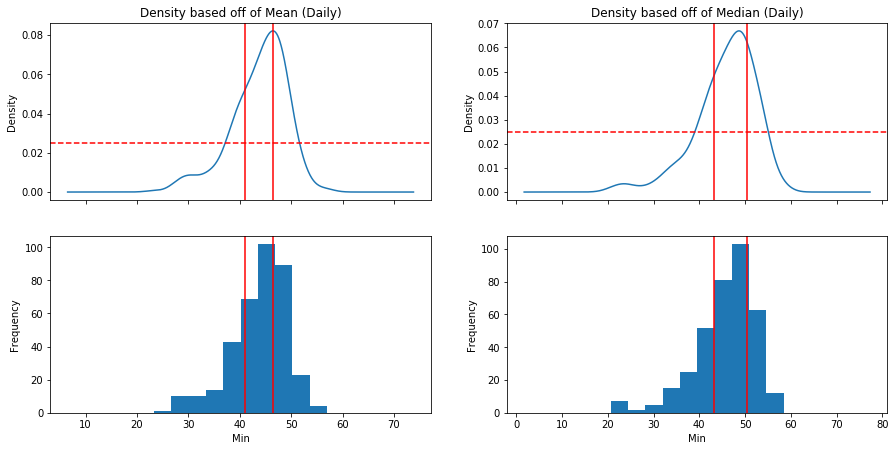

In [215]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(421)
ax = df_test['Mins'].resample('D').mean().plot.kde()
ax.axvline(41, color ='r')
ax.axvline(46.5, color ='r')
ax.axhline(.025, color ='r', linestyle ='--')
ax.title.set_text('Density based off of Mean (Daily)')
#ax.set_xlabel('Min')

ax2 = fig.add_subplot(422)
ax2 = df_test['Mins'].resample('D').median().plot.kde()
ax2.axvline(43.2, color ='r')
ax2.axvline(50.5, color ='r')
ax2.axhline(.025, color ='r', linestyle ='--')
ax2.title.set_text('Density based off of Median (Daily)')
#ax2.set_xlabel('Min')

ax3 = fig.add_subplot(423, sharex=ax)
ax3 = df_test['Mins'].resample('D').mean().plot.hist()
ax3.axvline(41, color ='r')
ax3.axvline(46.5, color ='r')
ax3.set_xlabel('Min')

ax4 = fig.add_subplot(424, sharex=ax2)
ax4 = df_test['Mins'].resample('D').median().plot.hist()
ax4.axvline(43.2, color ='r')
ax4.axvline(50.5, color ='r')
ax4.set_xlabel('Min')

plt.show()


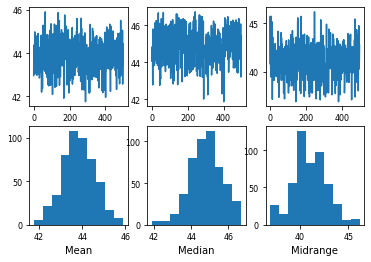

In [17]:
tempvar = bootstrap_plot(df_test['Mins'].resample('D').mean(), size=50, samples=500)

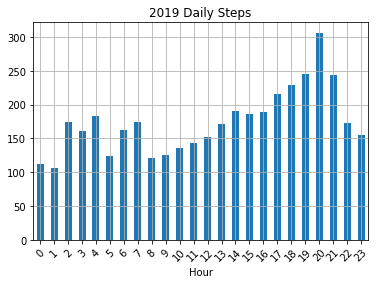

In [256]:
df_test = df
df_test.groupby('Hour')['Step count'].mean().plot.bar(rot=45, grid=True, title="2019 Daily Steps")

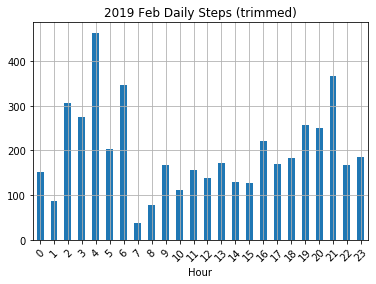

In [261]:
df_testframe = df['2019-02']
df_testframe.groupby('Hour')['Step count'].mean().plot.bar(rot=45, grid=True, title="2019 Feb Daily Steps (trimmed)")

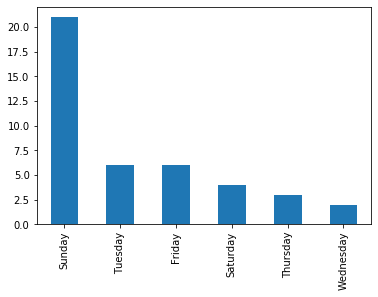

In [264]:
df_testframe['Day'][(df_testframe['Step count'] > 100) & (df_testframe['Hour'].between(1,4))].value_counts().plot.bar()
